In [855]:
import pandas as pd
import numpy as np
import joblib

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score

In [645]:
df = pd.read_csv('Employee-Attrition.csv', index_col=0)

In [647]:
df.shape

(1470, 34)

In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 41 to 34
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                   1470

In [651]:
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,,,,,
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [653]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Indlæs df
df = pd.read_csv("Employee-Attrition.csv")

# 2. Find alle kategoriske kolonner (dtype = object)
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# 3. Initialiser LabelEncoder
le = LabelEncoder()

# 4. Loop og encod hver kolonne
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


df.sample(10)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1063,29,0,2,1246,2,19,3,1,1,1497,...,3,80,2,10,3,3,10,7,0,4
676,35,0,2,1137,1,21,1,1,1,942,...,4,80,1,10,2,1,10,6,0,7
510,54,0,2,397,0,19,4,3,1,698,...,3,80,1,16,1,4,9,7,7,1
777,21,1,2,1334,1,10,3,1,1,1079,...,1,80,0,1,6,2,1,0,1,0
607,49,1,2,1184,2,11,3,2,1,840,...,1,80,2,9,3,4,9,8,7,7
672,42,0,2,462,2,14,2,3,1,936,...,1,80,0,10,6,3,5,4,0,3
1026,32,0,2,601,2,7,5,2,1,1446,...,3,80,1,7,3,2,4,3,0,3
61,38,0,1,653,1,29,5,1,1,79,...,4,80,0,10,2,3,10,3,9,9
1154,47,0,2,1176,0,26,4,1,1,1625,...,3,80,1,27,2,3,5,2,1,0
309,31,0,2,691,1,5,4,5,1,423,...,3,80,1,6,4,3,5,2,0,3


In [655]:
#dataframe with outliers
dfo = df.copy()
dfo.shape

(1470, 35)

In [657]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [659]:
sns.pairplot(df, x_vars=['Department', 'BusinessTravel', 'DistanceFromHome'], y_vars='Attrition', height=5, aspect=0.8)


In [661]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [663]:
corr_matrix = df.corr()
corr_matrix

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000,-0.159,0.025,0.011,-0.032,-0.002,0.208,-0.041,NaN,-0.010,...,0.054,NaN,0.038,0.680,-0.020,-0.021,0.311,0.213,0.217,0.202
Attrition,-0.159,1.000,0.000,-0.057,0.064,0.078,-0.031,0.027,NaN,-0.011,...,-0.046,NaN,-0.137,-0.171,-0.059,-0.064,-0.134,-0.161,-0.033,-0.156
BusinessTravel,0.025,0.000,1.000,-0.004,-0.009,-0.024,0.001,0.024,NaN,-0.016,...,-0.036,NaN,-0.017,0.034,0.015,-0.011,-0.015,-0.011,-0.033,-0.023
DailyRate,0.011,-0.057,-0.004,1.000,0.007,-0.005,-0.017,0.038,NaN,-0.051,...,0.008,NaN,0.042,0.015,0.002,-0.038,-0.034,0.010,-0.033,-0.026
Department,-0.032,0.064,-0.009,0.007,1.000,0.017,0.008,0.014,NaN,-0.011,...,-0.022,NaN,-0.012,-0.016,0.037,0.026,0.023,0.056,0.040,0.034
DistanceFromHome,-0.002,0.078,-0.024,-0.005,0.017,1.000,0.021,0.002,NaN,0.033,...,0.007,NaN,0.045,0.005,-0.037,-0.027,0.010,0.019,0.010,0.014
Education,0.208,-0.031,0.001,-0.017,0.008,0.021,1.000,-0.040,NaN,0.042,...,-0.009,NaN,0.018,0.148,-0.025,0.010,0.069,0.060,0.054,0.069
EducationField,-0.041,0.027,0.024,0.038,0.014,0.002,-0.040,1.000,NaN,-0.003,...,-0.004,NaN,-0.016,-0.028,0.049,0.041,-0.019,-0.011,0.002,-0.004
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010,-0.011,-0.016,-0.051,-0.011,0.033,0.042,-0.003,NaN,1.000,...,-0.070,NaN,0.062,-0.014,0.024,0.010,-0.011,-0.008,-0.009,-0.009


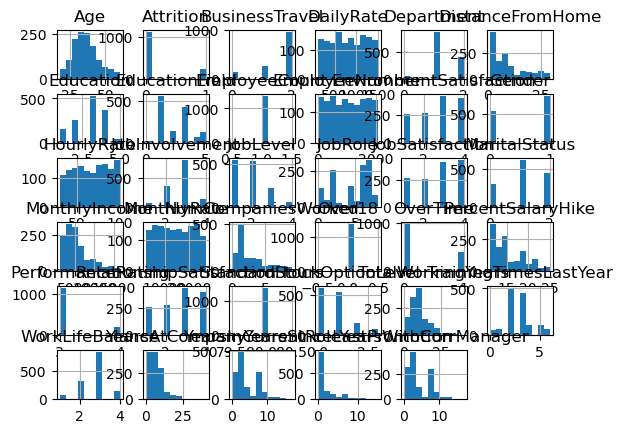

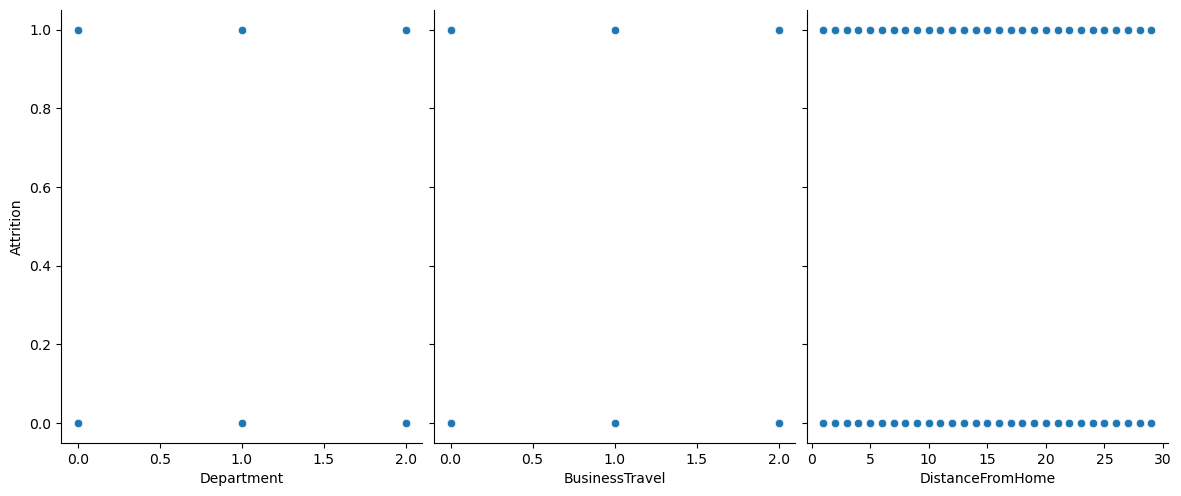

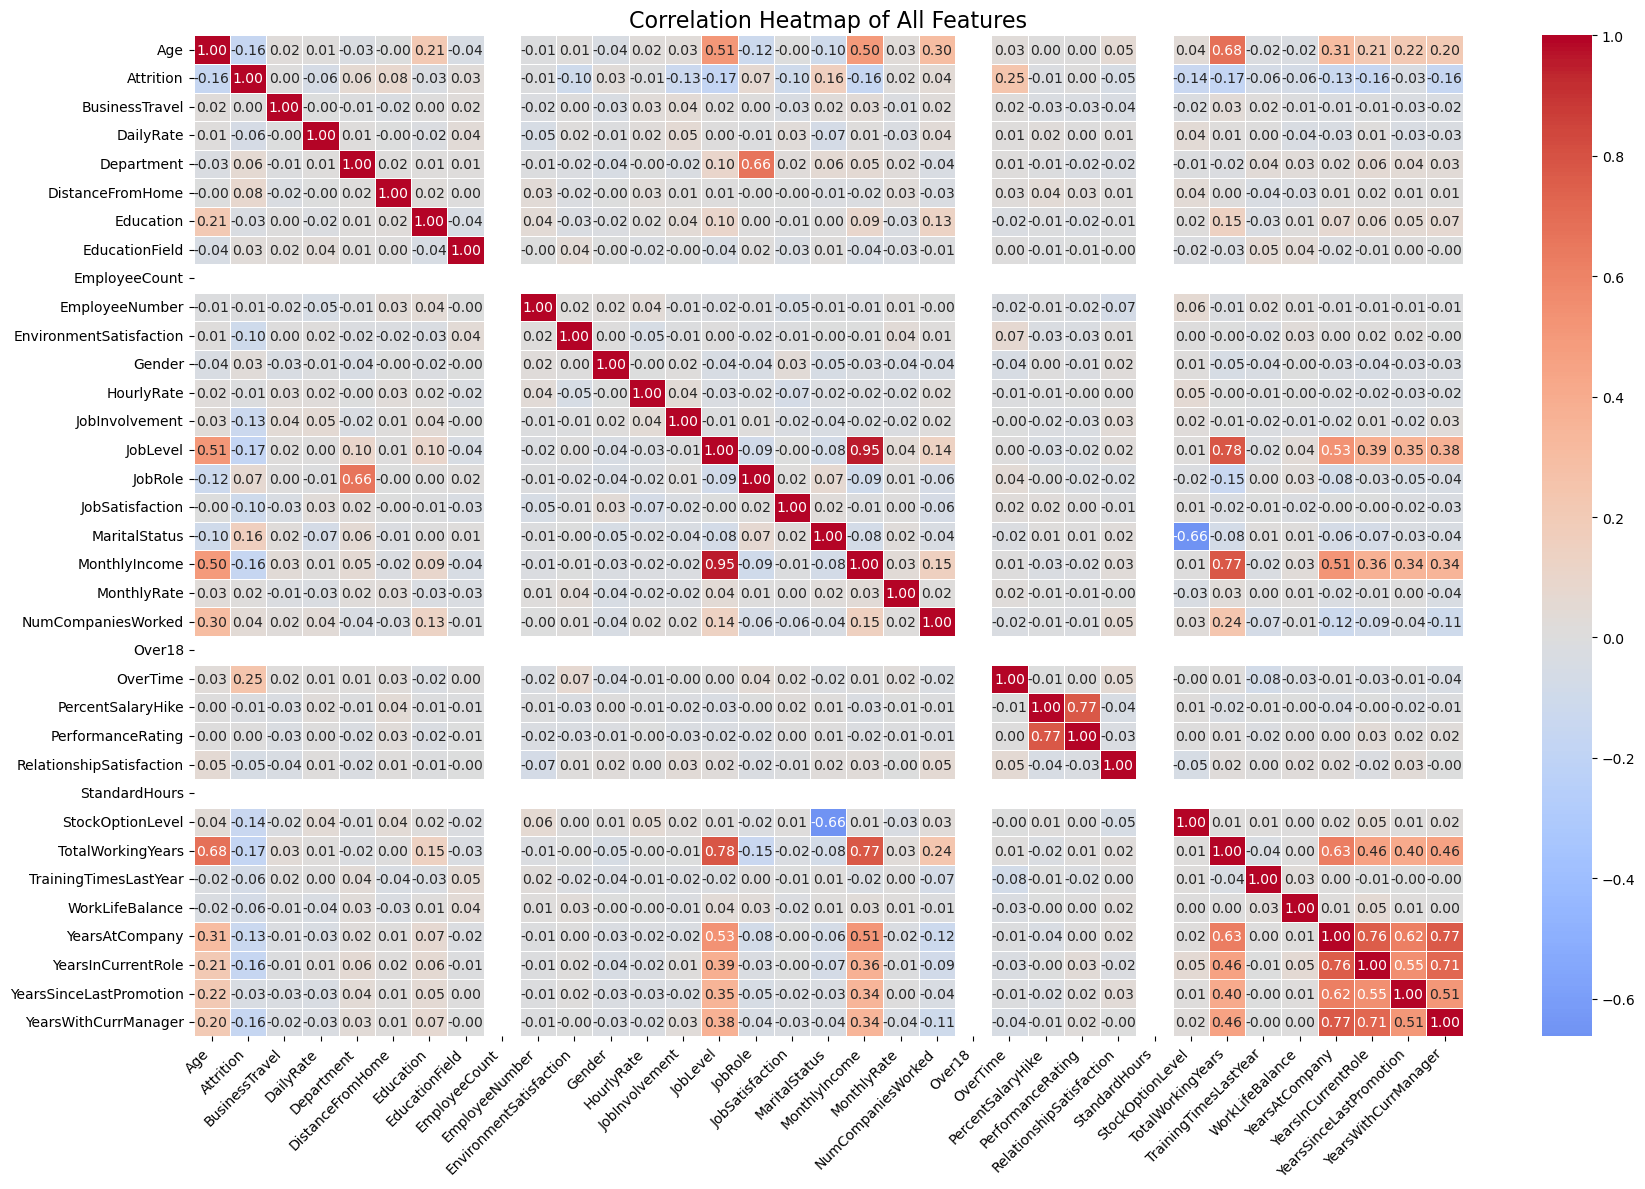

In [665]:
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap of All Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

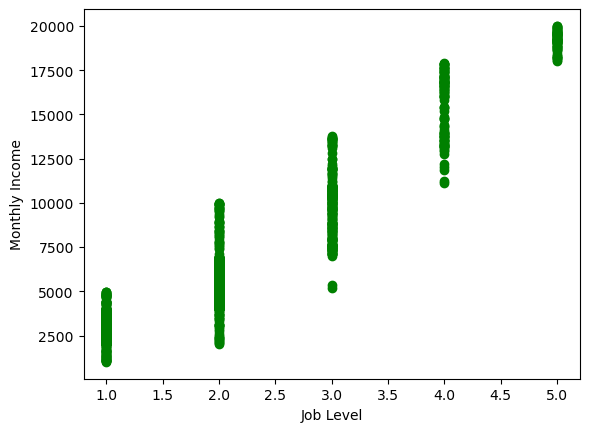

In [667]:
#Skatterplot
plt.xlabel('Job Level')
plt.ylabel('Monthly Income')
plt.scatter(df.JobLevel ,df.MonthlyIncome, color='green')
plt.show()

In [669]:
# histograms
hist = df.hist()

In [670]:
# indkomst
sns.distplot(df['MonthlyIncome'],  label='Monthly Income', norm_hist=True)  

/var/folders/_9/1wncpzhj5lg0z06jsr1f9f0c0000gn/T/ipykernel_18033/1177183308.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyIncome'],  label='Monthly Income', norm_hist=True)


<Axes: xlabel='MonthlyIncome', ylabel='Density'>

In [673]:
# Joblevel
sns.distplot(df['JobLevel'],  label='Job level', norm_hist=True) 

/var/folders/_9/1wncpzhj5lg0z06jsr1f9f0c0000gn/T/ipykernel_18033/789017390.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['JobLevel'],  label='Job level', norm_hist=True)


<Axes: xlabel='JobLevel', ylabel='Density'>

In [675]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,...,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000
mean,36.924,0.161,1.607,802.486,1.261,9.193,2.913,2.248,1.000,1024.865,...,2.712,80.000,0.794,11.280,2.799,2.761,7.008,4.229,2.188,4.123
std,9.135,0.368,0.665,403.509,0.528,8.107,1.024,1.331,0.000,602.024,...,1.081,0.000,0.852,7.781,1.289,0.706,6.127,3.623,3.222,3.568
min,18.000,0.000,0.000,102.000,0.000,1.000,1.000,0.000,1.000,1.000,...,1.000,80.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
25%,30.000,0.000,1.000,465.000,1.000,2.000,2.000,1.000,1.000,491.250,...,2.000,80.000,0.000,6.000,2.000,2.000,3.000,2.000,0.000,2.000
50%,36.000,0.000,2.000,802.000,1.000,7.000,3.000,2.000,1.000,1020.500,...,3.000,80.000,1.000,10.000,3.000,3.000,5.000,3.000,1.000,3.000
75%,43.000,0.000,2.000,1157.000,2.000,14.000,4.000,3.000,1.000,1555.750,...,4.000,80.000,1.000,15.000,3.000,3.000,9.000,7.000,3.000,7.000
max,60.000,1.000,2.000,1499.000,2.000,29.000,5.000,5.000,1.000,2068.000,...,4.000,80.000,3.000,40.000,6.000,4.000,40.000,18.000,15.000,17.000


In [677]:
#ret antal decimaler
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [679]:
boxplot = df.boxplot(column=['MonthlyIncome', 'JobLevel'])  
boxplot

<Axes: xlabel='JobLevel', ylabel='Density'>

In [681]:
# outliers by interquartile range (IQR)
from typing import List
def remove_outliers(df, data: List):
    q1 = data.quantile(.25)
    q3 = data.quantile(.75)
    IQR = q3 - q1
    # values smaller than 1.5 IQR below q1 and bigger that 1.5 IQR over q3 
    outliers = df[(data < (q1 - 1.5 * IQR)) | (data > (q3 + 1.5 * IQR))]
    df = df.drop(outliers.index, inplace=True)
    return df

In [685]:
remove_outliers(df, df['MonthlyIncome'])

In [687]:
df.shape

(1356, 35)

In [689]:
dfo.shape

(1470, 35)

### Train a model


In [692]:
# independent
##features = ['Education', 'YearsAtCompany', 'TotalWorkingYears', 'JobLevel', 'StockOptionLevel']
features = [
    'JobLevel',
    'JobRole',
    'Department',
    'Education',
    'EducationField',
    'TotalWorkingYears'
]
X = df[features].values
# dependent
y = df['MonthlyIncome'].values.reshape(-1, 1)


#with outliers
Xo = dfo[features].values
yo = dfo['MonthlyIncome'].values.reshape(-1, 1)

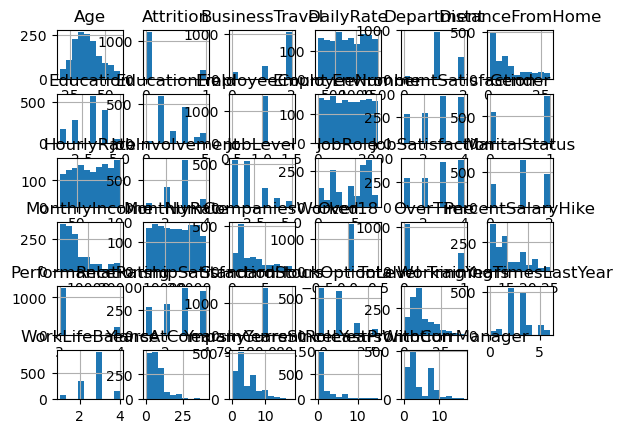

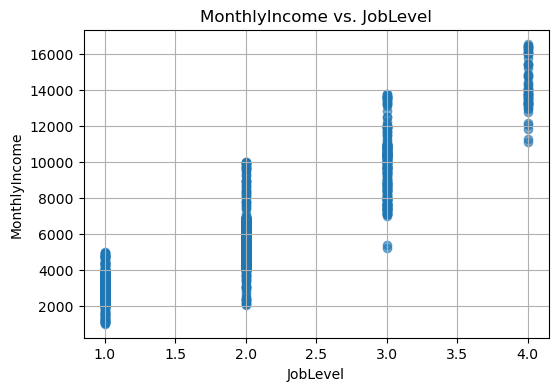

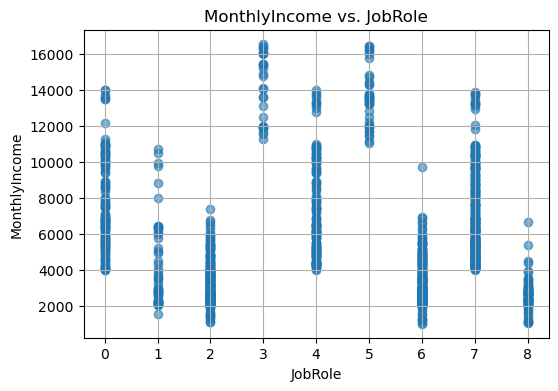

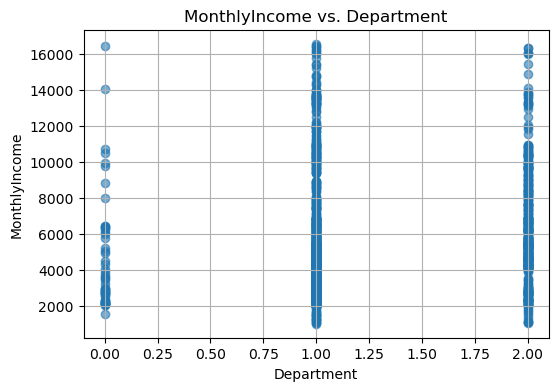

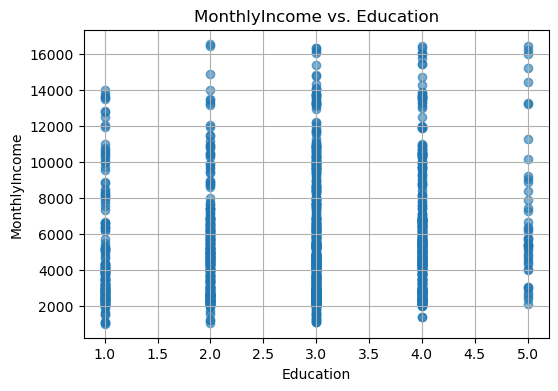

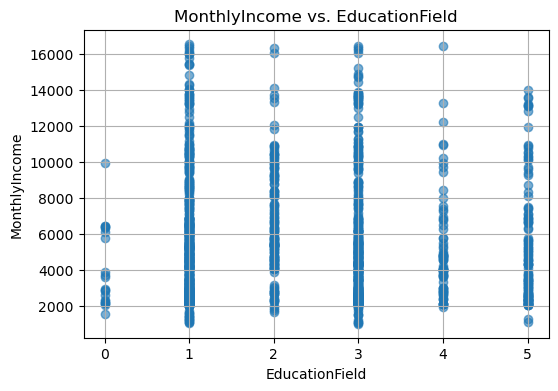

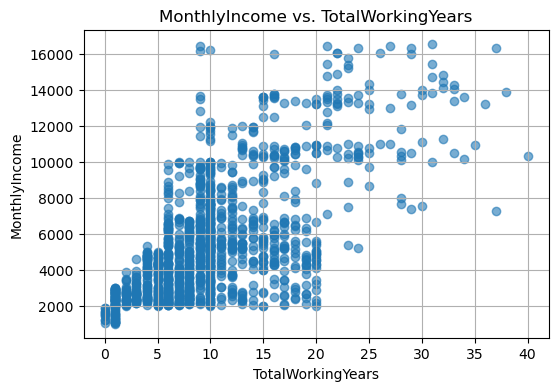

In [694]:

for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature], df['MonthlyIncome'], alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('MonthlyIncome')
    plt.title(f'MonthlyIncome vs. {feature}')
    plt.grid(True)
    plt.show()


In [696]:
df.plot.line(subplots=True)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

In [697]:
print("X shape:", X.shape)
print("y shape:", y.shape)


print("X with outliers shape:", Xo.shape)
print("y with outliers shape:", yo.shape)

X shape: (1356, 6)
y shape: (1356, 1)
X with outliers shape: (1470, 6)
y with outliers shape: (1470, 1)


In [725]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#with outliers
Xo_train, Xo_test, yo_train, yo_test = train_test_split(Xo, yo, test_size=0.25, random_state=1)

In [702]:
#subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1017, 6)
(1017, 1)
(339, 6)
(339, 1)


In [704]:
#subsets with outliers
print(Xo_train.shape)
print(yo_train.shape)
print(Xo_test.shape)
print(yo_test.shape)

(1102, 6)
(1102, 1)
(368, 6)
(368, 1)


In [706]:
# creating an instance of Linear Regression model
myreg = LinearRegression()

In [708]:
myreg.fit(X_train, y_train)
myreg.fit(Xo_train, yo_train)
myreg



LinearRegression()

In [710]:
a = myreg.coef_
b = myreg.intercept_

In [712]:
a

array([[3846.14289035,   55.22860669, -521.82725916,  -31.76876371,
           9.11870217,   38.74085048]])

In [714]:
b

array([-1417.54606512])

In [716]:
print(f"The model is a line, y = a * x + b, or y = {a} * x + {b}")

The model is a line, y = a * x + b, or y = [[3846.14289035   55.22860669 -521.82725916  -31.76876371    9.11870217
    38.74085048]] * x + [-1417.54606512]


### Test

In [727]:
y_predicted = myreg.predict(X_test)
yo_predicted = myreg.predict(Xo_test)

In [729]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error:", mean_squared_error(y_test, y_predicted))
print("R² Score:", r2_score(y_test, y_predicted))

Mean Squared Error: 2068843.114345547
R² Score: 0.7868226696875746


In [731]:
print("Mean Squared Error with outliers:", mean_squared_error(yo_test, yo_predicted))
print("R² Score with outliers:", r2_score(yo_test, yo_predicted))

Mean Squared Error with outliers: 2123705.76899454
R² Score with outliers: 0.9072609469885364


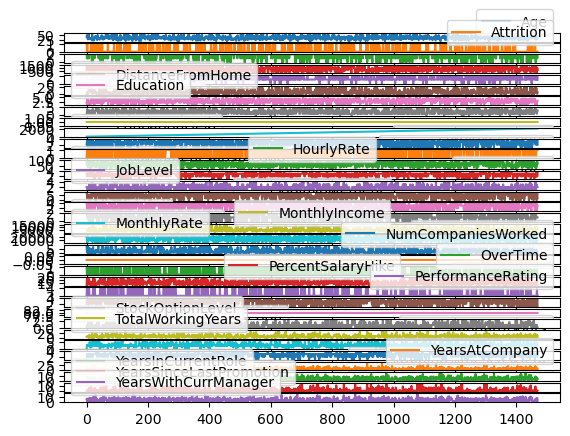

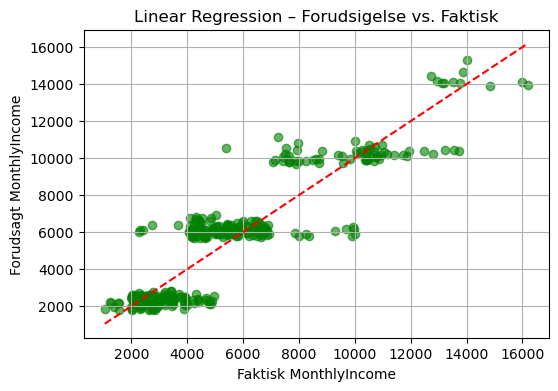

In [733]:
# Visualise the Linear Regression 

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_predicted, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Faktisk MonthlyIncome")
plt.ylabel("Forudsagt MonthlyIncome")
plt.title("Linear Regression – Forudsigelse vs. Faktisk")
plt.grid(True)
plt.show()

In [753]:
coef_df = pd.DataFrame({
    'Feature': features,
    'Koefficient': myreg.coef_.flatten()
})

print(coef_df)

             Feature  Koefficient
0           JobLevel     3846.143
1            JobRole       55.229
2         Department     -521.827
3          Education      -31.769
4     EducationField        9.119
5  TotalWorkingYears       38.741


coef_df.sort_values(by='Koefficient', key=abs, ascending=False).plot.bar(x='Feature', y='Koefficient')
plt.title("Feature-vægte i modellen")
plt.grid(True)
plt.show()

In [755]:
income_predicted = myreg.predict([[3, 11, 11, 3, 0, 5]])  
income_predicted

array([[5086.69539004]])

### Model Evaluation


In [760]:
# MAE
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted)
print(mae)

1099.8133560984372


In [762]:
# MSE
mse = metrics.mean_squared_error(y_test, y_predicted)
print(mse)

2068843.114345547


In [764]:
# RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
print(rmse)

1438.3473552468288


### R Squared

In [767]:
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  0.79


In [775]:
eVo = round(sm.explained_variance_score(yo_test, yo_predicted), 2)
print('Explained variance score with outliers',eVo )

Explained variance score with outliers 0.91


In [769]:
from sklearn.metrics import r2_score
#r2_score(y, predict(X))
r2_score(y_test, y_predicted)

0.7868226696875746

In [773]:
#r2_score(y, predict(X))
#with outliers
r2_score(yo_test, yo_predicted)

0.9072609469885364

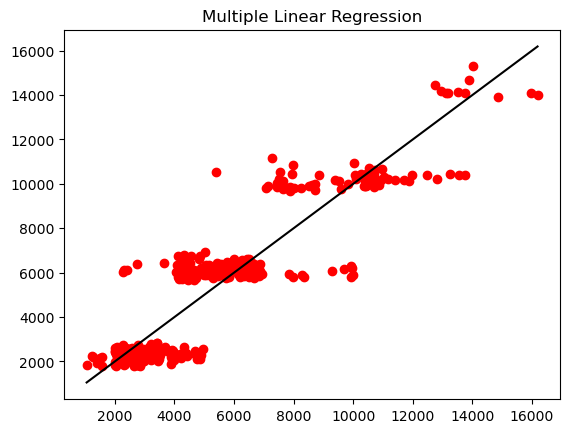

In [777]:
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='red')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], color='black')
plt.show()

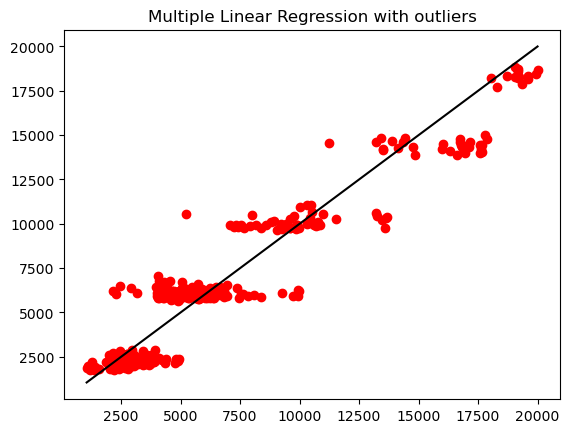

In [781]:
# Visualise the regression results with outliers
plt.title('Multiple Linear Regression with outliers')
plt.scatter(yo_test, yo_predicted, color='red')
plt.plot([yo_test.min(), yo_test.max()],
         [yo_test.min(), yo_test.max()], color='black')
plt.show()

In [812]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Xo_train_scaled = scaler.fit_transform(Xo_train)
Xo_test_scaled = scaler.transform(Xo_test)

### Without outliers

In [881]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Train model
meanshift = MeanShift()
meanshift.fit(X_test_scaled)

#save model
meanshift_model = joblib.dump(meanshift, 'meanshift_model.pkl')

# 2. Get labels
ms_labels = meanshift.labels_

# 3. evaluate
if len(set(ms_labels)) > 1:
    ms_score = silhouette_score(X_test_scaled, ms_labels)
else:
    ms_score = "Ikke muligt — kun én klynge fundet"

# 4. Add labels to dataframe
X_test_meanshift = pd.DataFrame(X_test, columns=features) 
X_test_meanshift["Cluster"] = ms_labels

# 5. Print results
print("\n=== Mean Shift Resultater ===")
print("Antal klynger fundet:", len(set(ms_labels)))
print("Silhouette score:", ms_score)



=== Mean Shift Resultater ===
Antal klynger fundet: 1
Silhouette score: Ikke muligt — kun én klynge fundet


### With outliers

In [814]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Train model
meanshift = MeanShift()
meanshift.fit(Xo_test_scaled)

# 2. Get labels
ms_labels = meanshift.labels_

# 3. evaluate
if len(set(ms_labels)) > 1:
    ms_score = silhouette_score(Xo_test_scaled, ms_labels)
else:
    ms_score = "Ikke muligt — kun én klynge fundet"

# 4. Add labels to dataframe
Xo_test_meanshift = pd.DataFrame(Xo_test, columns=features) 
Xo_test_meanshift["Cluster"] = ms_labels

# 5. Print results
print("\n=== Mean Shift Resultater ===")
print("Antal klynger fundet:", len(set(ms_labels)))
print("Silhouette score:", ms_score)



=== Mean Shift Resultater ===
Antal klynger fundet: 1
Silhouette score: Ikke muligt — kun én klynge fundet


### Without outliers

In [879]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

best_k = None
best_score = -1
best_labels = None

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_test_scaled)
    score = silhouette_score(X_test_scaled, labels)
    if score > best_score:
        best_score = score
        best_k = k
        best_labels = labels


X_test_kmeans = pd.DataFrame(X_test, columns=features)
X_test_kmeans["Cluster"] = best_labels

kmeans_model = KMeans(n_clusters=best_k, random_state=42, n_init=10).fit(X_test_scaled)
joblib.dump(kmeans_model, 'kmeans_model.pkl')



print("=== K-means Resultater ===")
print("Bedste antal klynger:", best_k)
print("Silhouette score:", best_score)

=== K-means Resultater ===
Bedste antal klynger: 2
Silhouette score: 0.2522571336135308


### With outliers

In [828]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

best_k = None
best_score = -1
best_labels = None

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(Xo_test_scaled)
    score = silhouette_score(Xo_test_scaled, labels)
    if score > best_score:
        best_score = score
        best_k = k
        best_labels = labels


Xo_test_kmeans = pd.DataFrame(Xo_test, columns=features)
Xo_test_kmeans["Cluster"] = best_labels


print("=== K-means Resultater ===")
print("Bedste antal klynger:", best_k)
print("Silhouette score:", best_score)

=== K-means Resultater ===
Bedste antal klynger: 3
Silhouette score: 0.2897126293520852


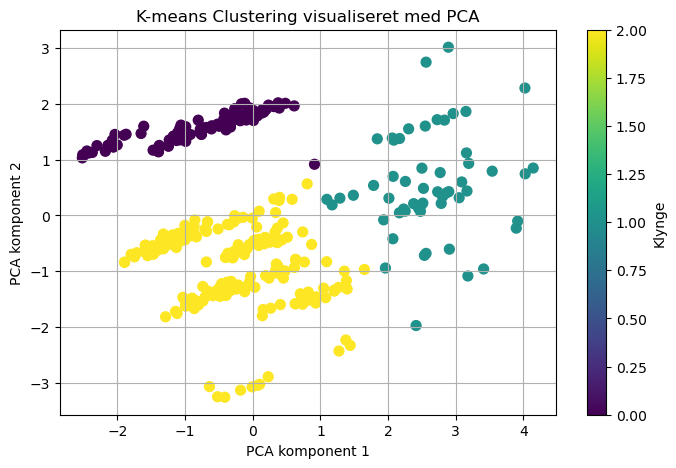

In [830]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xo_test_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap='viridis', s=50)
plt.title("K-means Clustering visualiseret med PCA")
plt.xlabel("PCA komponent 1")
plt.ylabel("PCA komponent 2")
plt.colorbar(label="Klynge")
plt.grid(True)
plt.show()

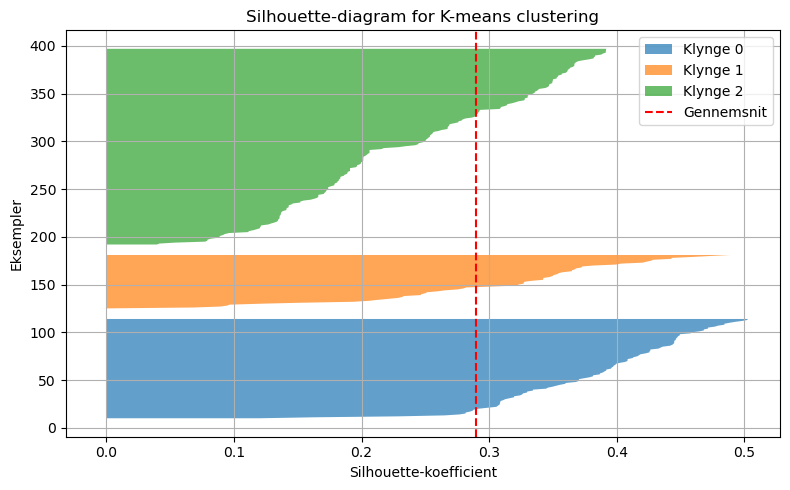

In [834]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
# Beregn silhouette-scoren for hvert punkt
silhouette_vals = silhouette_samples(Xo_test_scaled, best_labels)

# Antal klynger
n_clusters = len(np.unique(best_labels))


# Lav plot
plt.figure(figsize=(8, 5))
y_lower = 10

for i in range(n_clusters):
    ith_cluster_silhouette_vals = silhouette_vals[best_labels == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      alpha=0.7, label=f"Klynge {i}")
    y_lower = y_upper + 10

plt.axvline(np.mean(silhouette_vals), color="red", linestyle="--", label="Gennemsnit")
plt.xlabel("Silhouette-koefficient")
plt.ylabel("Eksempler")
plt.title("Silhouette-diagram for K-means clustering")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Store and reuse model


In [865]:
linreg_file = 'MP3ML.pkl'

In [867]:
joblib.dump(myreg, linreg_file)

['MP3ML.pkl']

In [871]:
#linear regression model
linreg_model = joblib.load(linreg_file)

In [861]:
y_predict = linreg_model.predict(X_test)

In [863]:
# 6 attributes needed('JobLevel,JobRole,Department,Education,EducationField,TotalWorkingYears')
income_prediction = linreg_model.predict([[10, 3, 3, 4, 2, 12]])
print(income_prediction)

[[36000.13943629]]


In [887]:
#meanshift
meanshift_model = joblib.load('meanshift_model.pkl')

In [885]:
#Kmeans
kmeans_model = joblib.load('kmeans_model.pkl')
